In [277]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
salaries = pd.read_csv ('Datasets\CSV Tech Salary.csv')
currency = pd.read_csv ('Datasets\Currency Details.csv')
emp = pd.read_csv ('Datasets\Employment Type description.csv')
iso = pd.read_csv ('Datasets\ISO 3166-1 alpha-2.csv')
jobs = pd.read_csv ('Datasets\Jobs Category.csv')

In [81]:
salaries.shape

(16534, 11)

In [83]:
currency.shape

(32, 5)

In [85]:
emp.shape

(4, 5)

In [87]:
iso.shape

(199, 3)

In [89]:
jobs.shape

(155, 2)

In [91]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [93]:
currency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Currency Symbol       32 non-null     object 
 1   Currency Code         32 non-null     object 
 2   Currency Name         32 non-null     object 
 3   Usage Zone            32 non-null     object 
 4   Exchange Rate to USD  32 non-null     float64
dtypes: float64(1), object(4)
memory usage: 1.4+ KB


In [95]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Type Code    4 non-null      object
 1   Type Name    4 non-null      object
 2   Description  4 non-null      object
 3   x            4 non-null      object
 4   x.1          3 non-null      object
dtypes: object(5)
memory usage: 292.0+ bytes


In [64]:
iso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       199 non-null    object
 1   Alpha-2 Code  198 non-null    object
 2   Continent     199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [66]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Job Title  155 non-null    object
 1   Category   155 non-null    object
dtypes: object(2)
memory usage: 2.6+ KB


In [46]:
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [98]:
salaries['work_year'].value_counts()

work_year
2023    8519
2024    6067
2022    1655
2021     218
2020      75
Name: count, dtype: int64

In [119]:
x = salaries.merge (jobs, how = 'left', left_on = "job_title", right_on = "Job Title")
x

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Job Title,Category
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M,AI Engineer,AI
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M,AI Engineer,AI
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M,Data Engineer,Data
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M,Data Engineer,Data
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M,Machine Learning Engineer,AI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,Data Scientist,Data
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,Principal Data Scientist,Data
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,Data Scientist,Data
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,Business Data Analyst,Business Intelligence


In [265]:
salary = x.merge (iso, how = 'left', left_on = "company_location", right_on = "Alpha-2 Code")
salary

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Job Title,Category,Country,Alpha-2 Code,Continent
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M,AI Engineer,AI,United States,US,North America
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M,AI Engineer,AI,United States,US,North America
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M,Data Engineer,Data,United States,US,North America
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M,Data Engineer,Data,United States,US,North America
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M,Machine Learning Engineer,AI,United States,US,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,Data Scientist,Data,United States,US,North America
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,Principal Data Scientist,Data,United States,US,North America
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,Data Scientist,Data,United States,US,North America
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,Business Data Analyst,Business Intelligence,United States,US,North America


In [267]:
salary.rename(columns={"work_year": "Year"}, inplace=True)
salary ['JobCategory'] = salary ['Category'].astype ("string")
salary ['JobTitle'] = salary ['Job Title'].astype ("string")
salary ['ExperienceLevel'] = salary ['experience_level'].astype ("string")
salary.rename(columns={"remote_ratio": "RemoteRatio"}, inplace=True)
salary.rename(columns={"salary_in_usd": "UsdSalary"}, inplace=True)
salary ['CompanyContinent'] = salary ['Continent'].astype ("string")
salary ['CompanyCountry'] = salary ['Country'].astype ("string")
salary ['CompanySize'] = salary ['company_size'].astype ("string")

salMask = salary.loc [:, ["Year", "JobCategory", "JobTitle",  "ExperienceLevel", "RemoteRatio", "UsdSalary", "CompanyContinent", "CompanyCountry", "CompanySize"]]
salMask

,Year,JobCategory,JobTitle,ExperienceLevel,RemoteRatio,UsdSalary,CompanyContinent,CompanyCountry,CompanySize
0,2024,AI,AI Engineer,SE,0,202730,North America,United States,M
1,2024,AI,AI Engineer,SE,0,92118,North America,United States,M
2,2024,Data,Data Engineer,SE,0,130500,North America,United States,M
3,2024,Data,Data Engineer,SE,0,96000,North America,United States,M
4,2024,AI,Machine Learning Engineer,SE,0,190000,North America,United States,M
...,...,...,...,...,...,...,...,...,...
16529,2020,Data,Data Scientist,SE,100,412000,North America,United States,L
16530,2021,Data,Principal Data Scientist,MI,100,151000,North America,United States,L
16531,2020,Data,Data Scientist,EN,100,105000,North America,United States,S
16532,2020,Business Intelligence,Business Data Analyst,EN,100,100000,North America,United States,L


In [269]:
salMask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              16534 non-null  int64 
 1   JobCategory       16534 non-null  string
 2   JobTitle          16534 non-null  string
 3   ExperienceLevel   16534 non-null  string
 4   RemoteRatio       16534 non-null  int64 
 5   UsdSalary         16534 non-null  int64 
 6   CompanyContinent  16534 non-null  string
 7   CompanyCountry    16534 non-null  string
 8   CompanySize       16534 non-null  string
dtypes: int64(3), string(6)
memory usage: 1.1 MB


In [275]:
salMask.describe()

,Year,RemoteRatio,UsdSalary
count,16534.000000,16534.000000,16534.000000
mean,2023.226866,32.003750,149686.777973
std,0.713558,46.245158,68505.293156
min,2020.000000,0.000000,15000.000000
25%,2023.000000,0.000000,101125.000000
50%,2023.000000,0.000000,141300.000000
75%,2024.000000,100.000000,185900.000000
max,2024.000000,100.000000,800000.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


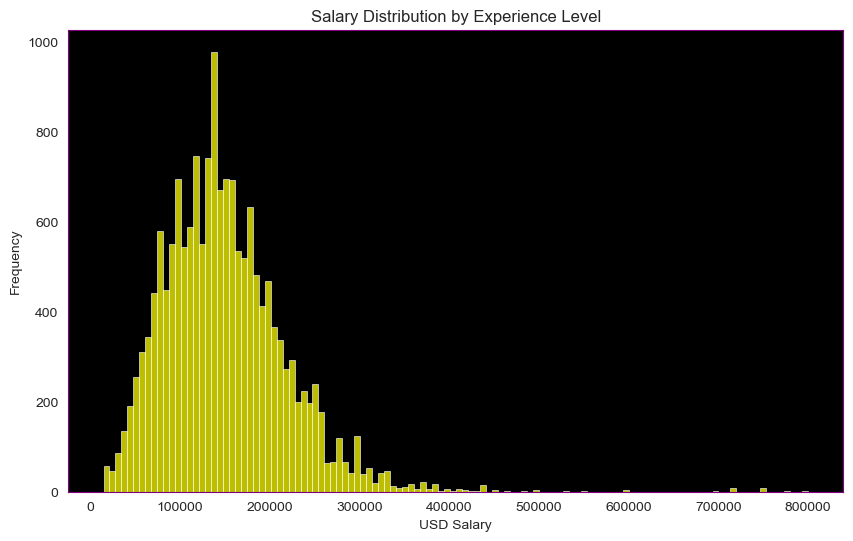

In [353]:
plt.figure(figsize=(10, 6))

sns.set_style("dark", {"axes.facecolor": "black", "axes.edgecolor": "purple", "grid.color": "purple"})

sns.histplot(salMask['UsdSalary'], color='yellow', line_kws={'color': 'purple'})

plt.title('Salary Distribution by Experience Level')
plt.xlabel('USD Salary')
plt.ylabel('Frequency')

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


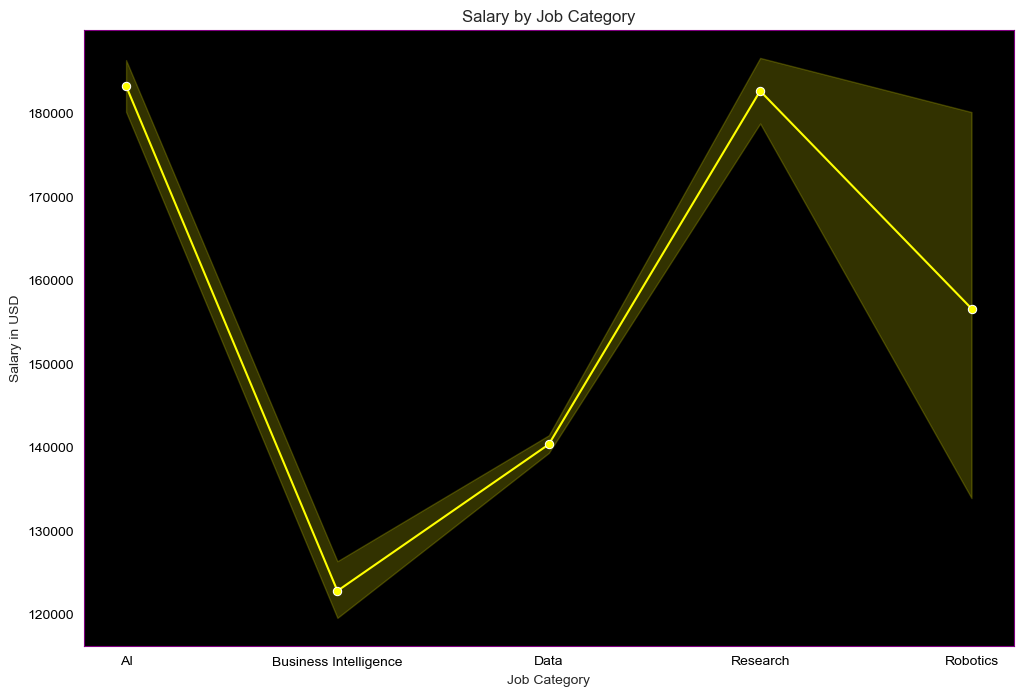

In [339]:
plt.figure(figsize=(12, 8))

Category = salMask.sort_values('JobCategory')
sns.set_style("dark", {"axes.facecolor": "black", "axes.edgecolor": "purple", "grid.color": "purple"})

sns.lineplot(x='JobCategory', y='UsdSalary', data=Category, marker='o', color='yellow')

plt.title('Salary by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Salary in USD')

plt.xticks(color='black')
plt.yticks(color='black')

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


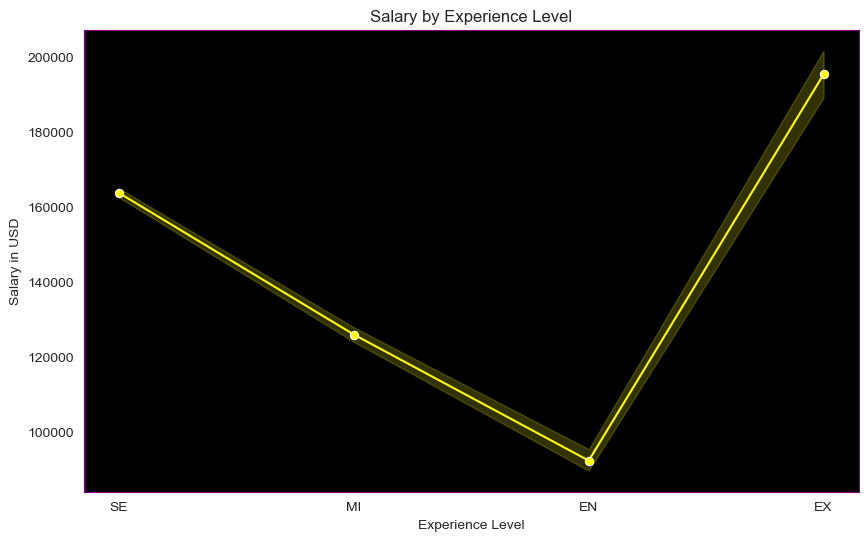

In [ ]:
plt.figure(figsize=(10, 6))

sns.set_style("dark", {"axes.facecolor": "black", "axes.edgecolor": "purple", "grid.color": "purple"})

sns.lineplot(x='ExperienceLevel', y='UsdSalary', data=salMask, marker='o', color='yellow')

plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')

plt.show()